# Customer Segmentation Workflow 2- PCA Analysis and Segmentation Analysis

Principal Component Analysis (PCA) is an Unsupervised Learning task. It is used as a dimensionality reduction technique that creates new features by finding linear combinations of original features. The new "principal components", are chosen to maximize the explained variance and typically replace the original features in analysis.

PCA provides linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.


In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA


# Scikit-Learn's KMeans algorithm (added later)
from sklearn.cluster import KMeans

# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score


In [2]:
# Read item_data.csv
item_data = pd.read_csv('item_data.csv', index_col=0)

In [3]:
item_data.shape

(414, 2574)

 ## Principal Component Analysis - Feature Dimensionality Reduction
 PCA assumes that features are on the same scale.

In [4]:
#Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [10]:
# Initialize and fit a PCA transformation - this generates the PCA components that best explain teh varaince in our data set
pca = PCA()
pca.fit(item_data_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# transform the original features using the fitted PCA instance.
PC_items = pca.transform(item_data_scaled)

In [12]:
PC_items.shape

(414, 414)

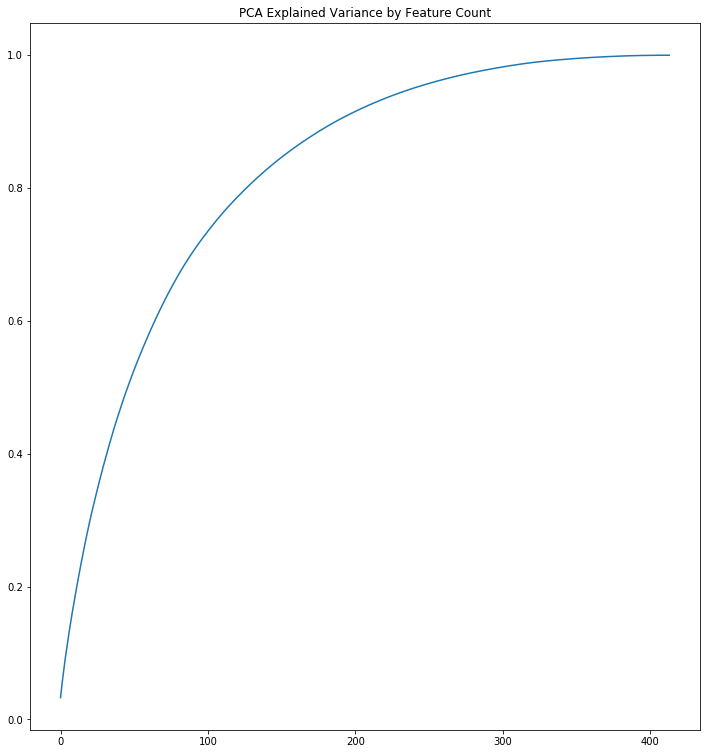

In [13]:
#Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(12,13))
plt.title("PCA Explained Variance by Feature Count")
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

PCA has reduced 2574 features down to 125 while capturing 80% of the original variance.

In [14]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[124]

0.7955069032205403

Refit the PCA and retransform the item dataset using only 125 components

In [15]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

In [16]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828926,-0.495549,3.093954,-0.633728,-11.534129,2.161954,7.116690,5.336138,4.424442,4.636782,2.316481,12.310555,1.986654,-11.431699,5.617402,-2.177780,7.665194,-12.136834,-16.049452,-5.949338,7.814880,40.517646,-35.575010,-17.559056,6.867572,20.884981,2.293474,-26.159449,-32.579111,7.877503,12.360077,6.835050,-32.954524,-4.409840,-17.240980,-11.274207,-14.485983,-2.765292,4.735870,-6.988340,-1.465290,10.598943,1.235903,3.082259,5.333382,-0.408582,1.599374,-6.399508,3.047181,...,2.315629,2.562078,-0.640196,-1.599881,-1.954835,1.222714,0.497492,-1.466465,-2.144062,-3.488956,0.009704,-1.726030,0.663832,0.435709,0.850777,-2.194152,0.218009,0.182514,-0.168106,0.714561,-0.468042,-0.471739,-0.021950,-0.290568,-0.203471,0.160232,-0.121446,-1.667410,-0.522576,-0.371963,0.170699,-0.828356,0.277927,1.355316,-0.443473,-0.533872,1.437339,-0.320505,0.140692,-0.162850,-0.151742,-0.048282,-0.699562,0.131670,0.003988,-0.142223,0.248296,0.257679,-0.662083,0.036909
12348,-4.219834,1.226174,-1.881890,-0.174252,0.818103,1.160704,-0.872089,-0.847305,0.460662,0.854202,-0.401909,0.981636,-1.103829,0.769770,-0.092528,-0.313272,-0.448810,1.207233,0.380640,-0.469643,0.185830,0.054371,0.503480,0.370071,1.225352,-0.772878,-0.272293,0.849858,-0.369337,-0.576209,1.001847,-0.582319,0.951593,-0.738699,0.359630,-0.391802,-0.297645,0.414247,0.163316,0.331730,-0.474327,0.707149,1.192126,-0.208600,-0.876814,-0.042727,-0.411393,-1.620579,-0.377557,0.462096,...,-1.058594,-0.758019,-0.577282,-0.324023,-0.065355,0.203741,-0.701554,-0.215310,0.644318,0.193197,0.162269,-0.079684,-1.818056,0.333321,-0.851234,-0.928230,0.071211,0.915077,-0.428301,1.043008,-0.272952,0.390821,1.253253,0.343682,-1.737322,-0.389088,0.824186,0.535216,1.283086,-1.374048,-0.890146,-1.652133,-0.733749,-1.441332,0.621819,-0.546489,0.271912,0.045462,-0.725069,-0.506489,1.979517,0.857474,0.051512,-0.392170,-0.076171,-1.627954,1.728929,-0.353698,1.501825,0.483270
12349,-1.260838,2.387721,-0.073157,-1.119231,-0.034280,-3.716213,-0.343876,-0.149370,-0.790594,-0.379816,1.570482,0.183806,0.224088,-0.050417,3.179568,-0.512183,-1.838672,0.385260,0.316238,-0.001990,-0.414078,0.453170,-0.784801,1.752828,-1.484995,0.760121,-0.903785,0.781914,0.509406,-1.354533,0.279734,0.666447,0.090372,-0.228599,-0.671974,-1.521461,0.798953,-1.407762,-0.094437,-0.933806,0.099699,-0.093652,-0.175448,0.695947,1.367630,-0.237811,-0.109713,-0.163492,0.879743,1.723561,...,1.975751,-0.666621,1.626884,0.568810,1.082567,0.109803,-0.952389,0.768076,1.094802,-0.888594,1.742167,0.474415,-2.739282,-2.341112,1.312384,-3.101413,-1.768166,-1.985826,-1.401550,-1.124900,0.375989,0.255332,1.595474,2.068819,0.380596,-1.596887,0.453187,1.639014,-1.994100,-0.539567,-2.352528,-1.940139,-1.241233,0.461720,0.457040,-4.163061,-2.810624,1.683271,2.217773,1.558734,-4.000274,-1.872109,-1.225985,-0.249765,-2.944856,-2.043220,2.960467,2.084997,-1.732433,5.925693
12350,-4.929320,-0.714886,-1.580879,-0.469895,-0.116206,0.647771,0.112803,-1.336048,1.547340,-1.190624,-0.213186,1.057495,-0.474654,0.856434,-1.305132,0.242139,0.268745,1.953243,-0.227562,0.570341,-0.187590,0.904203,1.363405,0.177652,-0.261230,-0.168254,-0.682075,1.080939,-0.152468,-0.398576,0.241796,0.634201,-1.446056,-0.185493,-0.313374,-0.304305,-1.359434,-0.002375,0.579431,-0.244704,0.591907,-0.214830,0.286201,0.528904,-0.526248,-0.104641,-1.473443,0.127

In [17]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')


In [18]:
# Import analytical base table - aggregated customer and invoice features
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# Import thresholded item features - 20 most popular items indexed by customer ids
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features - reduced dimensionality PCA feature set indexed by customer id
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

## K-Means Clustering
K Means is an unsupervised clustering algorithm which clusters based on minimzing a distance metric
for k - a specified numbers of cluster means.

Here we run K-Means for 3 datasets:
* base_df -  aggregated customer-level data
* base_df + data on top 20 most populat items by customer purchases
* base_df + PCA components chosen by degree of variance explanation

In [19]:
#Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head()

,Total_Transactions,Total_Products,Total_Unique_Products,Total_Sales,Average_Product_Value,Avg_Cart_Value,Min_Cart_Value,Max_Cart_Value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,4.0,31.0,22.0,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,1.0,73.0,73.0,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,1.0,17.0,17.0,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,8.0,85.0,59.0,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [20]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head()

,Total_Transactions,Total_Products,Total_Unique_Products,Total_Sales,Average_Product_Value,Avg_Cart_Value,Min_Cart_Value,Max_Cart_Value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828926,-0.495549,3.093954,-0.633728,-11.534129,2.161954,7.116690,5.336138,4.424442,4.636782,2.316481,12.310555,1.986654,-11.431699,5.617402,-2.177780,7.665194,-12.136834,-16.049452,-5.949338,7.814880,40.517646,-35.575010,-17.559056,6.867572,20.884981,2.293474,-26.159449,-32.579111,7.877503,12.360077,6.835050,-32.954524,-4.409840,-17.240980,-11.274207,-14.485983,-2.765292,4.735870,-6.988340,-1.465290,...,2.315629,2.562078,-0.640196,-1.599881,-1.954835,1.222714,0.497492,-1.466465,-2.144062,-3.488956,0.009704,-1.726030,0.663832,0.435709,0.850777,-2.194152,0.218009,0.182514,-0.168106,0.714561,-0.468042,-0.471739,-0.021950,-0.290568,-0.203471,0.160232,-0.121446,-1.667410,-0.522576,-0.371963,0.170699,-0.828356,0.277927,1.355316,-0.443473,-0.533872,1.437339,-0.320505,0.140692,-0.162850,-0.151742,-0.048282,-0.699562,0.131670,0.003988,-0.142223,0.248296,0.257679,-0.662083,0.036909
12348,4.0,31.0,22.0,1797.24,57.975484,449.310000,227.44,892.80,-4.219834,1.226174,-1.881890,-0.174252,0.818103,1.160704,-0.872089,-0.847305,0.460662,0.854202,-0.401909,0.981636,-1.103829,0.769770,-0.092528,-0.313272,-0.448810,1.207233,0.380640,-0.469643,0.185830,0.054371,0.503480,0.370071,1.225352,-0.772878,-0.272293,0.849858,-0.369337,-0.576209,1.001847,-0.582319,0.951593,-0.738699,0.359630,-0.391802,-0.297645,0.414247,0.163316,0.331730,-0.474327,0.707149,...,-1.058594,-0.758019,-0.577282,-0.324023,-0.065355,0.203741,-0.701554,-0.215310,0.644318,0.193197,0.162269,-0.079684,-1.818056,0.333321,-0.851234,-0.928230,0.071211,0.915077,-0.428301,1.043008,-0.272952,0.390821,1.253253,0.343682,-1.737322,-0.389088,0.824186,0.535216,1.283086,-1.374048,-0.890146,-1.652133,-0.733749,-1.441332,0.621819,-0.546489,0.271912,0.045462,-0.725069,-0.506489,1.979517,0.857474,0.051512,-0.392170,-0.076171,-1.627954,1.728929,-0.353698,1.501825,0.483270
12349,1.0,73.0,73.0,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387721,-0.073157,-1.119231,-0.034280,-3.716213,-0.343876,-0.149370,-0.790594,-0.379816,1.570482,0.183806,0.224088,-0.050417,3.179568,-0.512183,-1.838672,0.385260,0.316238,-0.001990,-0.414078,0.453170,-0.784801,1.752828,-1.484995,0.760121,-0.903785,0.781914,0.509406,-1.354533,0.279734,0.666447,0.090372,-0.228599,-0.671974,-1.521461,0.798953,-1.407762,-0.094437,-0.933806,0.099699,-0.093652,...,1.975751,-0.666621,1.626884,0.568810,1.082567,0.109803,-0.952389,0.768076,1.094802,-0.888594,1.742167,0.474415,-2.739282,-2.341112,1.312384,-3.101413,-1.768166,-1.985826,-1.401550,-1.124900,0.375989,0.255332,1.595474,2.068819,0.380596,-1.596887,0.453187,1.639014,-1.994100,-0.539567,-2.352528,-1.940139,-1.241233,0.461720,0.457040,-4.163061,-2.810624,1.683271,2.217773,1.558734,-4.000274,-1.872109,-1.225985,-0.249765,-2.944856,-2.043220,2.960467,2.084997,-1.732433,5.925693
12350,1.0,17.0,17.0,334.40,19.670588,334.400000,334.40,334.40,-4.929320,-0.714886,-1.580879,-0.469895,-0.116206,0.647771,0.112803,-1.336048,1.547340,-1.190624,-0.213186,1.057495,-0.474654,0.856434,-1.305132,0.242139,0.268745,1.953243,-0.227562,0.570341,-0.187590,0.904203,1.363405,0.177652,-0.261230,-0.168254,-0.682075,1.080939,-0.152468,-0.398576,0.241796,0.634201,-1.446056,-0.185493,-0.313374,-0.304305,-1.359434,-0

The choice of number of clusters is dependent on the problem context 
and is a business decision rather than a technical one. 

In [21]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [22]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [23]:
# Append the cluster information for each row to the base_df
base_df['cluster'] = k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head()

,Total_Transactions,Total_Products,Total_Unique_Products,Total_Sales,Average_Product_Value,Avg_Cart_Value,Min_Cart_Value,Max_Cart_Value,cluster
CustomerID,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4.0,31.0,22.0,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1.0,73.0,73.0,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1.0,17.0,17.0,334.40,19.670588,334.400000,334.40,334.40,0
12352,8.0,85.0,59.0,2506.04,29.482824,313.255000,120.33,840.30,0


Text(0.5,1,'K Means Clustering for Customer-Level data')

<Figure size 864x936 with 0 Axes>

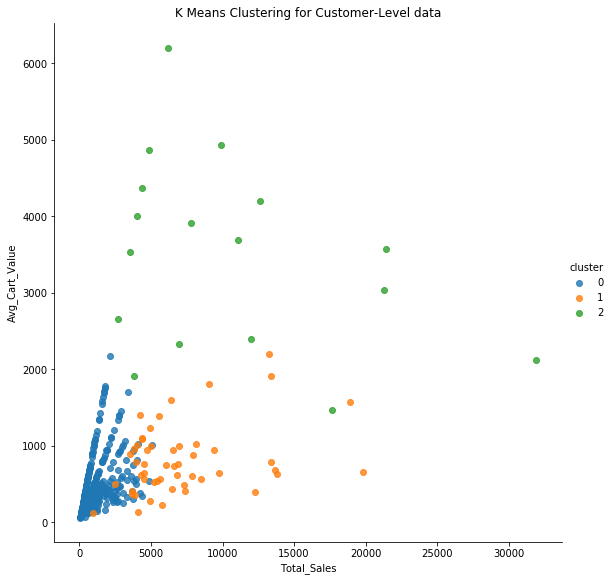

In [24]:
# Scatterplot, colored by cluster

plt.figure(figsize=(12,13))
sns.lmplot(x='Total_Sales', y='Avg_Cart_Value', hue='cluster', height=8, aspect=1, data=base_df,fit_reg=False)
plt.title("K Means Clustering for Customer-Level data")



In [25]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [26]:
# Fit K-Means pipeline
k_means.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [27]:
# Save clusters to threshold_df
threshold_df['cluster'] = k_means.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head()

,Total_Transactions,Total_Products,Total_Unique_Products,Total_Sales,Average_Product_Value,Avg_Cart_Value,Min_Cart_Value,Max_Cart_Value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0,0
12348,4.0,31.0,22.0,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2
12349,1.0,73.0,73.0,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2
12350,1.0,17.0,17.0,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
12352,8.0,85.0,59.0,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5,2


Text(0.5,1,'K Means Clustering for Customer-Level data with top 20 items by customer')

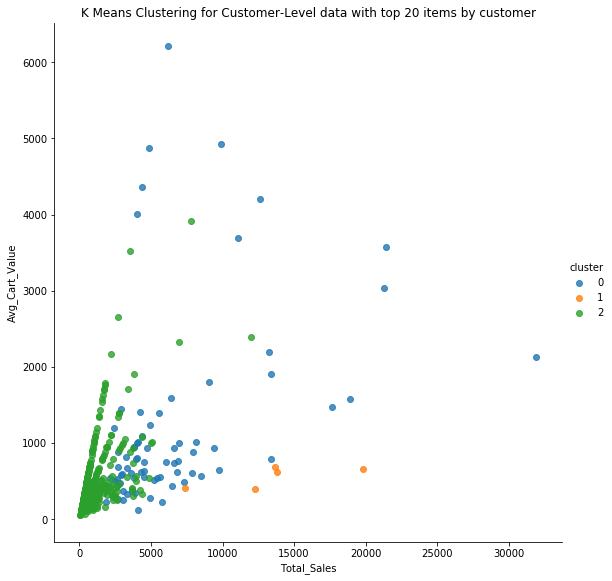

In [28]:
# Scatterplot, colored by cluster
sns.lmplot(x='Total_Sales', y='Avg_Cart_Value', hue='cluster', height=8, aspect=1, data=threshold_df, fit_reg=False)
plt.title("K Means Clustering for Customer-Level data with top 20 items by customer")


In [32]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [33]:
# Fit K-Means pipeline
k_means.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [34]:
# Save clusters to pca_df
pca_df['cluster'] = k_means.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head()

,Total_Transactions,Total_Products,Total_Unique_Products,Total_Sales,Average_Product_Value,Avg_Cart_Value,Min_Cart_Value,Max_Cart_Value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828926,-0.495549,3.093954,-0.633728,-11.534129,2.161954,7.116690,5.336138,4.424442,4.636782,2.316481,12.310555,1.986654,-11.431699,5.617402,-2.177780,7.665194,-12.136834,-16.049452,-5.949338,7.814880,40.517646,-35.575010,-17.559056,6.867572,20.884981,2.293474,-26.159449,-32.579111,7.877503,12.360077,6.835050,-32.954524,-4.409840,-17.240980,-11.274207,-14.485983,-2.765292,4.735870,-6.988340,-1.465290,...,2.562078,-0.640196,-1.599881,-1.954835,1.222714,0.497492,-1.466465,-2.144062,-3.488956,0.009704,-1.726030,0.663832,0.435709,0.850777,-2.194152,0.218009,0.182514,-0.168106,0.714561,-0.468042,-0.471739,-0.021950,-0.290568,-0.203471,0.160232,-0.121446,-1.667410,-0.522576,-0.371963,0.170699,-0.828356,0.277927,1.355316,-0.443473,-0.533872,1.437339,-0.320505,0.140692,-0.162850,-0.151742,-0.048282,-0.699562,0.131670,0.003988,-0.142223,0.248296,0.257679,-0.662083,0.036909,0
12348,4.0,31.0,22.0,1797.24,57.975484,449.310000,227.44,892.80,-4.219834,1.226174,-1.881890,-0.174252,0.818103,1.160704,-0.872089,-0.847305,0.460662,0.854202,-0.401909,0.981636,-1.103829,0.769770,-0.092528,-0.313272,-0.448810,1.207233,0.380640,-0.469643,0.185830,0.054371,0.503480,0.370071,1.225352,-0.772878,-0.272293,0.849858,-0.369337,-0.576209,1.001847,-0.582319,0.951593,-0.738699,0.359630,-0.391802,-0.297645,0.414247,0.163316,0.331730,-0.474327,0.707149,...,-0.758019,-0.577282,-0.324023,-0.065355,0.203741,-0.701554,-0.215310,0.644318,0.193197,0.162269,-0.079684,-1.818056,0.333321,-0.851234,-0.928230,0.071211,0.915077,-0.428301,1.043008,-0.272952,0.390821,1.253253,0.343682,-1.737322,-0.389088,0.824186,0.535216,1.283086,-1.374048,-0.890146,-1.652133,-0.733749,-1.441332,0.621819,-0.546489,0.271912,0.045462,-0.725069,-0.506489,1.979517,0.857474,0.051512,-0.392170,-0.076171,-1.627954,1.728929,-0.353698,1.501825,0.483270,1
12349,1.0,73.0,73.0,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387721,-0.073157,-1.119231,-0.034280,-3.716213,-0.343876,-0.149370,-0.790594,-0.379816,1.570482,0.183806,0.224088,-0.050417,3.179568,-0.512183,-1.838672,0.385260,0.316238,-0.001990,-0.414078,0.453170,-0.784801,1.752828,-1.484995,0.760121,-0.903785,0.781914,0.509406,-1.354533,0.279734,0.666447,0.090372,-0.228599,-0.671974,-1.521461,0.798953,-1.407762,-0.094437,-0.933806,0.099699,-0.093652,...,-0.666621,1.626884,0.568810,1.082567,0.109803,-0.952389,0.768076,1.094802,-0.888594,1.742167,0.474415,-2.739282,-2.341112,1.312384,-3.101413,-1.768166,-1.985826,-1.401550,-1.124900,0.375989,0.255332,1.595474,2.068819,0.380596,-1.596887,0.453187,1.639014,-1.994100,-0.539567,-2.352528,-1.940139,-1.241233,0.461720,0.457040,-4.163061,-2.810624,1.683271,2.217773,1.558734,-4.000274,-1.872109,-1.225985,-0.249765,-2.944856,-2.043220,2.960467,2.084997,-1.732433,5.925693,1
12350,1.0,17.0,17.0,334.40,19.670588,334.400000,334.40,334.40,-4.929320,-0.714886,-1.580879,-0.469895,-0.116206,0.647771,0.112803,-1.336048,1.547340,-1.190624,-0.213186,1.057495,-0.474654,0.856434,-1.305132,0.242139,0.268745,1.953243,-0.227562,0.570341,-0.187590,0.904203,1.363405,0.177652,-0.261230,-0.168254,-0.682075,1.080939,-0.152468,-0.398576,0.241796,0.634201,-1.446056,-0.185493,-0.313374,-0.304305,-1.359434,-0.002375,0.579431,-0

Text(0.5,1,'K Means Clustering for Customer-Level data with PCA components')

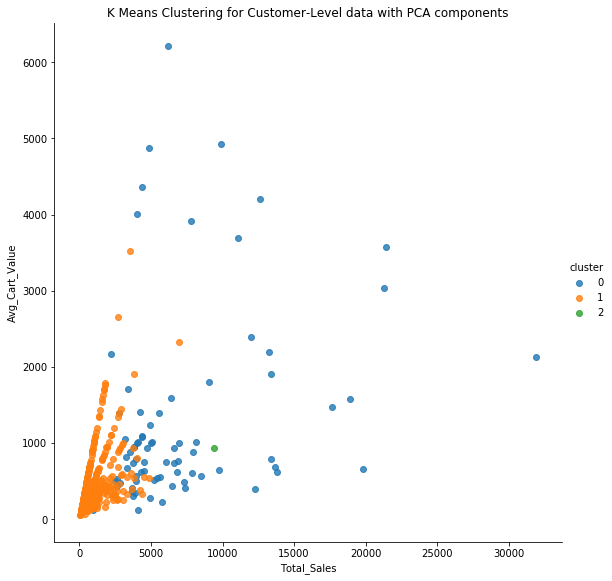

In [35]:
# Scatterplot, colored by cluster
sns.lmplot(x='Total_Sales', y='Avg_Cart_Value', hue='cluster', height=8, aspect=1, data=pca_df, fit_reg=False)
plt.title("K Means Clustering for Customer-Level data with PCA components")


In [36]:
# Check all indices are identical, i.e., that the 3 cluster sets contain the same customer_ids
print( all( base_df.index == threshold_df.index ) )
print( all( base_df.index == pca_df.index) )


True
True


The adjusted Rand index is a similarity measure between two clusters. It counts the observations that were assigned to the same or different clusters.
* Values close to 0.0 indicate random independent clusters
* Values close to 1.0 indicate nearly identical clusters


In [37]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)


0.6021354951782343

In [38]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)


0.756522951107575

In [39]:
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.6190847025464242

**Cluster generation is complete and now the client should validate the uefulness of the clusters for use in tailored campaigns.** 